In [21]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

In [22]:
def Muller(f, p, q, r, TOL, N = MaxIterations): 

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(p)
    x1 = copy.copy(q)
    x2 = copy.copy(r)
    
    print("\n\n*** MULLER METHOD IMPLEMENTATION ***")
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    h1 = x1 - x0  
    h2 = x2 - x1 
    
    f0 = f(x0) 
    f1 = f(x1) 
    f2 = f(x2) 
    
    d1 = (f1 - f0)/h1  
    d2 = (f2 - f1)/h2 
    d = (d2-d1)/(h1+h2) 
    i = 3
    
    while i<=N: 
        
        b = d2 +h2*d
        D = ((b**2)-4*f2*d)**(1/2)
            
        if(abs(b-D) < abs(b+D)):
            E = b + D 
        else:
            E = b - D

        h = -2*f2/E
        p = x2 + h
        
       
        
        print(f'Iteration = {i:3}   a = {d:.6f}     b = {b:.6f}     c = {f(x2):.6f}     p = {p:.6f}     f(p) = {f(p):.6f}')
        
        # Adding data in data list which was created for plotting table
        data.append([i,d,b,f(x2),p,f(p)])

        if(abs(h)<TOL or abs(f(p)) < TOL):
            print("\nFinal Root found")
            print(f'Iteration = {i:3}  a = {d:.6f}      b = {b:.6f}     c = {f(x2):.6f}    p = {p:.6f}       f(p) = {f(p):.6f}')
            print(f"Required Root is: {p:3.6f}")
            break
        
        x0 = x1
        x1 = x2
        x2 = p

        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([i,abs(x1-x2)])

        h1 = x1 - x0  
        h2 = x2 - x1 

        f0 = f(x0) 
        f1 = f(x1) 
        f2 = f(x2) 
        
        d1 = (f1 - f0)/h1  
        d2 = (f2 - f1)/h2 
        d = (d2-d1)/(h1+h2) 
    
        i += 1          # Incrementing step count for next iteration

    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','a','b','c','p (root)','f(p)'])
    for dt in data:
        table.add_row(dt)

    if (i > MaxIterations): 
        print("Root cannot be found using, Muller's method") 

    return accuracy,table

In [23]:
# Defining Function
def f(x):
    q = (x**4) -4*(x**2)-3*(x) +5
    return q

# Initial Guesses and accuracy
x0 = complex(-1.5,0)
x1 = complex(-1.5,1)
x2 = complex(-1.5,0.9)

e = 0.001

In [29]:

def f(x):
    q = 16*x**4 - 40*x**3 + 5*x**2 + 20*x + 6
    return q

# Initial Guesses and accuracy
x0 = 2.5
x1 = 2.0
x2 = 2.25

e = 0.00001
Muller(f,x0,x1,x2,e)



*** MULLER METHOD IMPLEMENTATION ***
Iteration =   3   a = 222.000000     b = 170.500000     c = 30.750000     p = 1.960592     f(p) = -0.611310
Iteration =   4   a = 168.399338     b = 59.627700     c = -0.611310     p = 1.970564     f(p) = 0.007455
Iteration =   5   a = 165.723614     b = 63.707040     c = 0.007455     p = 1.970447     f(p) = 0.000029
Iteration =   6   a = 140.444813     b = 63.422095     c = 0.000029     p = 1.970446     f(p) = 0.000000

Final Root found
Iteration =   6  a = 140.444813      b = 63.422095     c = 0.000029    p = 1.970446       f(p) = 0.000000
Required Root is: 1.970446


([[3, 0.28940771152019207],
  [4, 0.009971313554634875],
  [5, 0.00011706351180618135]],
 <prettytable.prettytable.PrettyTable at 0x1208571a9d0>)

In [25]:
m_acc,Muller_table = Muller(f,x0,x1,x2,e)



*** MULLER METHOD IMPLEMENTATION ***
Iteration =   3   a = -15.000000     b = -35.000000     c = -6.750000     p = 1.287855     f(p) = -1.376275
Iteration =   4   a = 7.537117     b = -26.929369     c = -1.376275     p = 1.237459     f(p) = 0.126945
Iteration =   5   a = 17.131642     b = -30.691534     c = 0.126945     p = 1.241605     f(p) = 0.002193
Iteration =   6   a = 5.692296     b = -30.067839     c = 0.002193     p = 1.241677     f(p) = -0.000001

Final Root found
Iteration =   6  a = 5.692296      b = -30.067839     c = 0.002193    p = 1.241677       f(p) = -0.000001
Required Root is: 1.241677


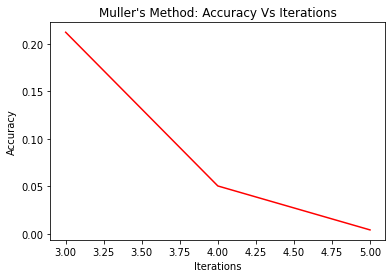

In [26]:
m_i = []
m_a = []
for i in m_acc:
    m_i.append(i[0])
    m_a.append(i[1])
plt.title("Muller's Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(m_i,m_a,color = 'red')
plt.show()

In [27]:
print(Muller_table)

+-----------+--------------------+---------------------+-----------------------+--------------------+------------------------+
| Iteration |         a          |          b          |           c           |      p (root)      |          f(p)          |
+-----------+--------------------+---------------------+-----------------------+--------------------+------------------------+
|     3     |       -15.0        |        -35.0        |         -6.75         | 1.2878547375517568 |  -1.3762745607955402   |
|     4     | 7.5371172005518625 | -26.929368812952553 |  -1.3762745607955402  | 1.2374587503613372 |   0.1269453986933229   |
|     5     | 17.131641762317788 |  -30.69153374178375 |   0.1269453986933229  | 1.2416045140563088 | 0.0021934087610979702  |
|     6     | 5.692295815304397  |  -30.06783878330703 | 0.0021934087610979702 | 1.2416774637308543 | -5.704036354359232e-07 |
+-----------+--------------------+---------------------+-----------------------+--------------------+----------